<a href="https://colab.research.google.com/github/BhargavPalaketi/Data-Preprocessing/blob/master/project_face_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install face_recognition

# The entire project has two modules
##1. Face Recogntion
##2. Face Clustering

#1. Face Extraction(Recognition) Module

In [0]:
import numpy as np

In [0]:
# for extracting faces from image repository
import face_recognition

In [0]:
import argparse

In [0]:
pip install imutils


In [1]:
#importing necessary libraries

from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os




ModuleNotFoundError: ignored

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
# unzip the data set...
from zipfile import ZipFile
file_name = "/content/face-clustering.zip"
with ZipFile(file_name,'r') as z:
  z.extractall()
  print("Done")


Done


In [0]:
# makig a path to the image source
print("quantifying faces")
imagePaths=list(paths.list_images("/content/face-clustering/dataset"))
data=[]

quantifying faces


In [0]:
#extracting the encodings(128-d feature vectors)
for (i,imagePath) in enumerate(imagePaths):
  print("processing image{}/{}".format(i+1,len(imagePaths)))
  print(imagePath)
  image = cv2.imread(imagePath)
  rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(rgb,model='cnn')
  encodings= face_recognition.face_encodings(rgb,boxes)
  #build a directory of image path,boundingbox,location
  #and facial encodings for the current image
  d=[{"imagePath":imagePath,"loc":box,"encoding":enc}
     for (box,enc) in zip(boxes,encodings)]
  data.extend(d)

processing image1/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.02.10 PM(4).jpeg
processing image2/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.02.09 PM(5).jpeg
processing image3/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 6.35.12 PM(1).jpeg
processing image4/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.53.08 AM.jpeg
processing image5/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 6.12.18 PM(2).jpeg
processing image6/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.02.11 PM(4).jpeg
processing image7/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.02.11 PM.jpeg
processing image8/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.02.10 PM(5).jpeg
processing image9/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.02.10 PM(9).jpeg
processing image10/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.02

In [0]:
# storing the encodings in pickle file
# which will bw later used for face clustering module
print("serialising encodings...")
f = open("face_encodings.pickle","wb")
pickle.dump(data,f)
f.close()

serialising encodings...


## 2 . Face Clustering Module

In [0]:
# import the necessary packages
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from imutils import build_montages
import numpy as np
import argparse
import pickle
import cv2

In [0]:
print("[INFO] loading encodings...")
data = pickle.loads(open("/content/face_encodings.pickle", "rb").read())
data = np.array(data)
encodings = [d["encoding"] for d in data]


[INFO] loading encodings...


In [0]:
# cluster the embeddings
print("[INFO] clustering...")
#for comparision purpose...
clt = DBSCAN(metric="euclidean", n_jobs=100)
#clt =KMeans(n_clusters=5)
clt.fit(encodings)
 
# determine the total number of unique faces found in the dataset
labelIDs = np.unique(clt.labels_)
numUniqueFaces = len(np.where(labelIDs > -1)[0])
print("[INFO] # unique faces: {}".format(numUniqueFaces))

[INFO] clustering...
[INFO] # unique faces: 2


In [0]:
from matplotlib import pyplot as plt

[INFO] faces for face ID: -1
[INFO] faces for face ID: 0
[INFO] faces for face ID: 1


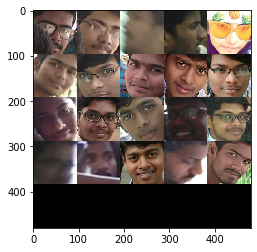

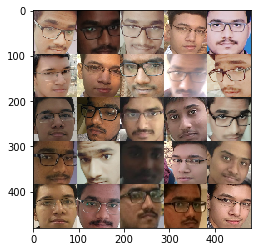

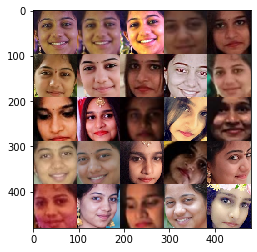

In [0]:
# loop over the unique faces an to print montages of each cluster
# to show instant output

for labelID in labelIDs:
  print("[INFO] faces for face ID: {}".format(labelID))
  idxs = np.where(clt.labels_ == labelID)[0]
  idxs = np.random.choice(idxs, size=min(25, len(idxs)),replace=False)
  # initialize the list of faces to include in the montage
  faces = []
  for i in idxs:
    image = cv2.imread(data[i]["imagePath"])
    (top,right,bottom,left) = data[i]["loc"]
    face = image[top:bottom,left:right]
    face = cv2.cvtColor(face,cv2.COLOR_RGB2BGR)
    face = cv2.resize(face,(96,96))
    faces.append(face)
    
  montage = build_montages(faces,(96,96),(5,5))[0]
  title = "Face ID #{}".format(labelID)
  title = "UnKnown Faces" if labelID == -1 else title
  plt.figure()
  plt.imshow(montage)
  cv2.waitKey(0)

# New Section